# Proyecto final

Andrea Monzon 23006810

Juan Pablo Rodas 23007521

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import patches

## Analisis exploratorio

El dataset utilizado es Airline Passenger Satisfaction, donde se va a intentar predecir la variable de Satisfaction, en base a las demas columnas del dataset, la columna de Satisfaction puede ser Satisfaction o neutral or dissatisfaction

In [2]:
dataTrain = pd.read_csv('train.csv')
dataTest = pd.read_csv('test.csv')
print(dataTrain.shape)
print(dataTest.shape)

(103904, 25)
(25976, 25)


In [3]:
dataTrain.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


separacion entre variables categoricas, discretas y continuas

In [4]:
def getColumnTypes(dataset):
     ''' Descripcion: Esta función extrae el tipo de dominio de las columnas de un dataset.
         Entradas: Pandas Dataframe  
         Salida: Tupla con arreglo que contine nombres de las columnas. '''
     
     continuas = []
     discretas = []
     categoricas = []
     for col in dataset.columns:
          if((dataset[col].dtype == 'int64') or (dataset[col].dtype == 'float64')):
               if(len(dataset[col].unique()) > 30): #criterio para discretas o continuas
                    continuas.append(col)
               else:
                    discretas.append(col)
          else:
               categoricas.append(col)

     return continuas, discretas, categoricas

In [5]:
continuas, discretas, categoricas = getColumnTypes(dataTrain)

In [6]:
categoricas

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [7]:
discretas

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [8]:
continuas

['Unnamed: 0',
 'id',
 'Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

cantidad de nulls en la data

In [9]:
dataTrain.isnull().mean()

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

revision de variables categoricas

In [10]:
def plotCatColumn_vrs_Target(df,colname,target):
  plt.figure(figsize=(10,5))
  plot = sns.countplot(x=df[colname],hue=df[target])
  plt.title(f'{colname} vs {target}')

  for p in plot.patches:
    plt.annotate(p.get_height(),(p.get_x()+p.get_width()/3,p.get_height()+50))

  plt.show()

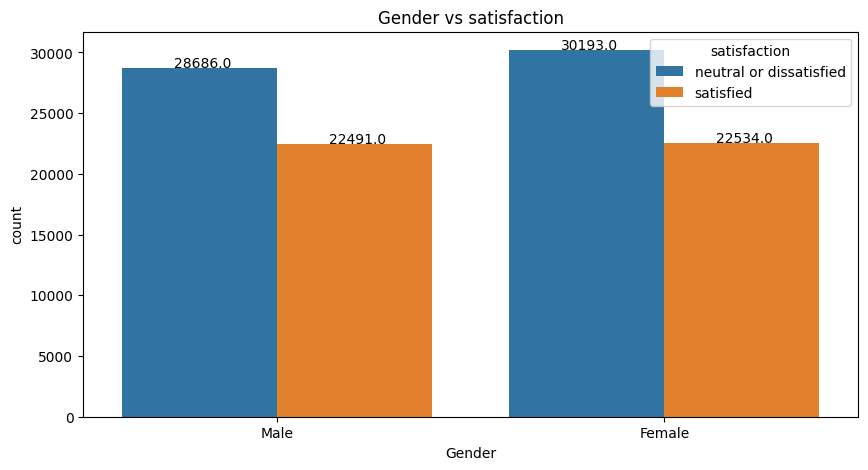

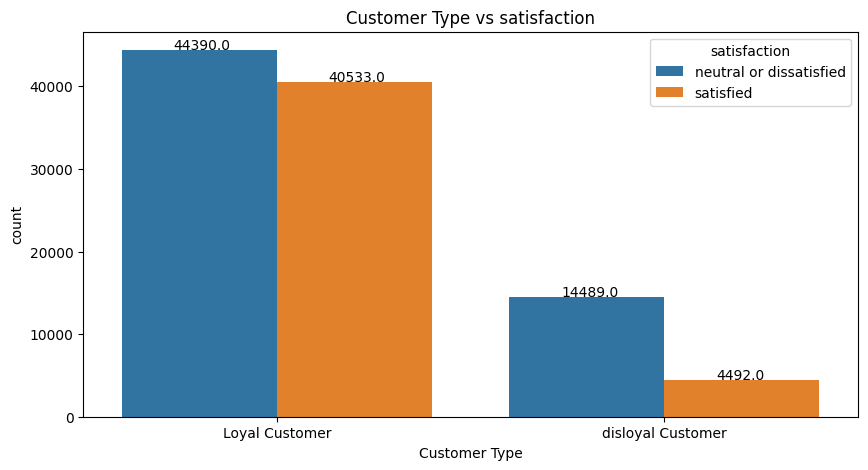

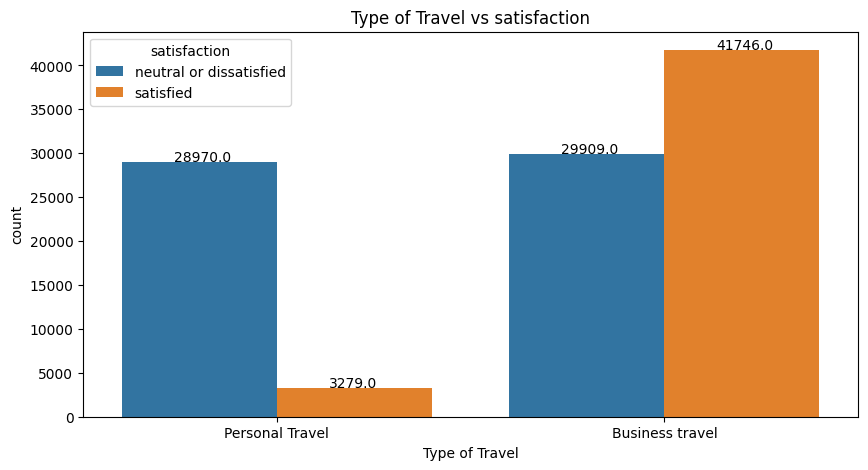

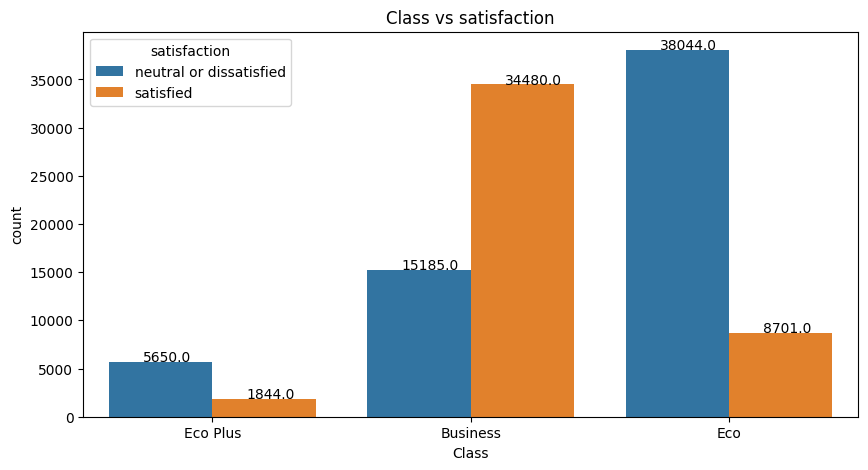

In [11]:
cat_wo_target = categoricas.copy()
cat_wo_target.remove('satisfaction')

for catCol in cat_wo_target:
  plotCatColumn_vrs_Target(dataTrain,catCol,'satisfaction')

segun lo mostrado por las graficas las variables de class y type of travel son las que mas impacto tienen en satisfaction

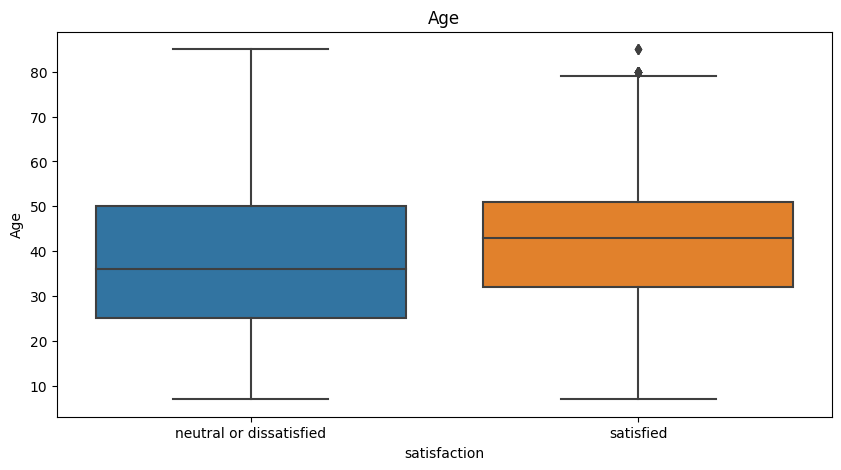

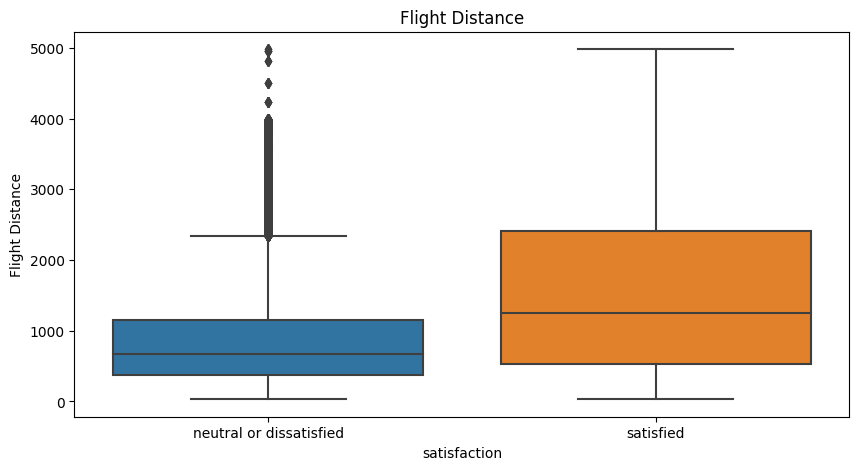

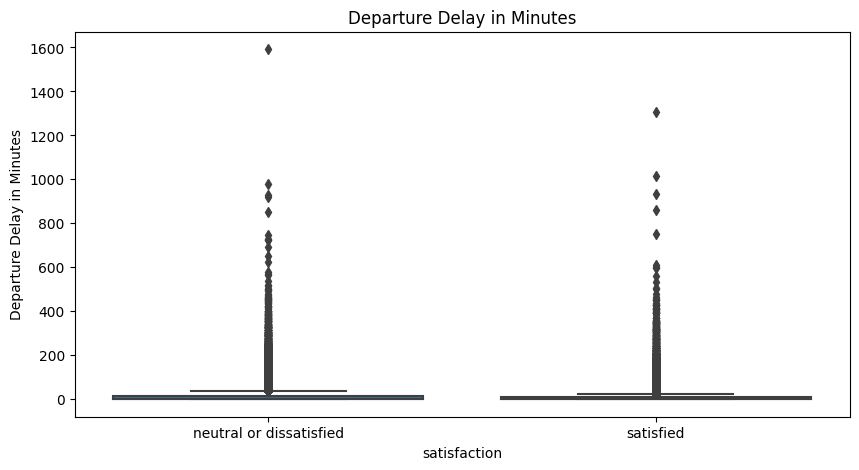

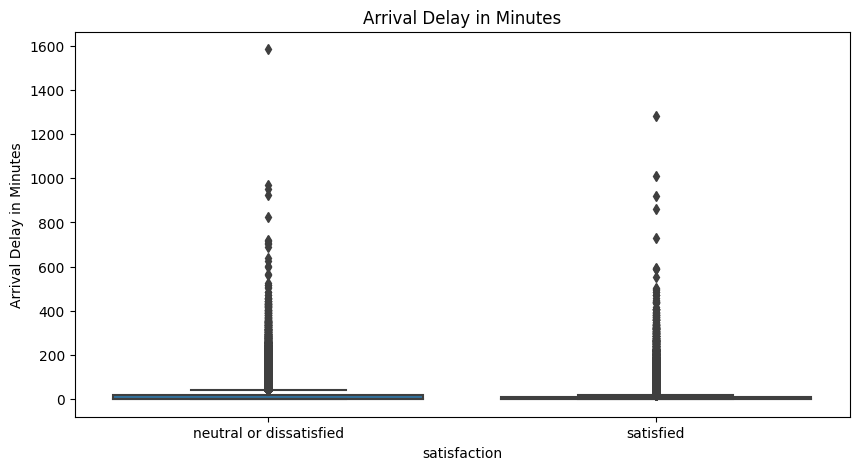

In [12]:
cont_wo_id = continuas.copy()
cont_wo_id.remove('id')
cont_wo_id.remove('Unnamed: 0')

for colName in cont_wo_id:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=dataTrain['satisfaction'],y=dataTrain[colName])
  plt.title(colName)
  plt.show()

segun lo mostrado por estas graficas, flight distance pareciera tener un impacto en la variable ded satisfaction

## Seleccion de Variables

variable a predecir:

**satisfaction**

In [13]:
y_test = dataTest['satisfaction']
y_train = dataTrain['satisfaction']
y_train.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

variables predictoras:

**Todas menos ID y la primera columna de conteo (unamed)**

In [14]:
var_preds = continuas+discretas+categoricas
var_preds.remove('Unnamed: 0')
var_preds.remove('id')
var_preds.remove('satisfaction')
print(var_preds)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [15]:
X_train = dataTrain[var_preds]
X_test = dataTest[var_preds]
X_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender,Customer Type,Type of Travel,Class
0,13,460,25,18.0,3,4,3,1,5,3,...,4,3,4,4,5,5,Male,Loyal Customer,Personal Travel,Eco Plus
1,25,235,1,6.0,3,2,3,3,1,3,...,1,5,3,1,4,1,Male,disloyal Customer,Business travel,Business
2,26,1142,0,0.0,2,2,2,2,5,5,...,4,3,4,4,4,5,Female,Loyal Customer,Business travel,Business
3,25,562,11,9.0,2,5,5,5,2,2,...,2,5,3,1,4,2,Female,Loyal Customer,Business travel,Business
4,61,214,0,0.0,3,3,3,3,4,5,...,3,4,4,3,3,3,Male,Loyal Customer,Business travel,Business
